Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00144: Experimental Methods in Civil Engineering


### Part I: Analysis
[3.   Statistics and probabilities](#section_3)   
[3.1. Random variables and probability distributions](#section_31)   
[3.2. Statistical moments and estimators](#section_32)   
[3.3. The uniform distribution](#section_33)   
[3.4. The gaussian distribution](#section_34)  
[3.5. Joint distributions and correlation](#section_35)  
[3.6. Simulation of correlated RV's](#section_36)   

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [84]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st


# 3. Statistics and probabilities

## 3.1. Random variables and probability distributions  

Uma variável aleatória $X$ tem suas propriedades estatísticas completamente determinadas pela sua função de probabilidade acumulada (fpa), $P_X(x)$, ou, opcionalmente, pela sua função de densidade de probabilidade (fdp), $p_X(x)$.

Seguindo uma abordagem conhecida como _frequentista_, o significado físico atribuído a estas funções matemáticas pode ser compreendido se um conjunto de  amostras independentes, $ \left\{ x_{1}, x_{2}, \dots, x_{i}, \dots, x_{N} \right\}$, é utilizado como ponto de partida para as definições. Sem perda de generalidade, admite-se a seguir que as amostras no conjunto estão ordenadas de forma ascendente, ou seja, $x_{1} < x_{2} < \dots < x_{N}$.

A partir deste conjunto de amostras é possível construir uma função em forma de escada que se denomina função empírica de probabilidade acumulada. Esta função adimensional é incrementada de $1/N$ nos pontos em que a abscissa $x$ coincide com os valores das amostras, atingindo valor máximo 1 a partir de $x = x_N$.

Vê-se na figura uma representação precisa e não tendenciosa do que foi observado a respeito da variável aleatória $X$. Até agora nenhuma hipótese foi feita e nenhum aspecto subjetivo foi incluído no procedimento, com exceção de eventuais peculiaridades do método de obtenção das amostras. Se esta abordagem fosse mantida e se fosse necessário estimar-se a propensão de  a assumir certos valores numéricos, tudo o que poderia ser dito pela abordagem frequentista é que:

\begin{align*}
{\rm Prob} \left\{ X = x_{i} \right\} &= 1/N \\
{\rm Prob} \left\{ X < x_{i} \right\} &= (i - 1)/N
\end{align*}

The simulation below demonstrates how to plot the empirical cumulative distribution:

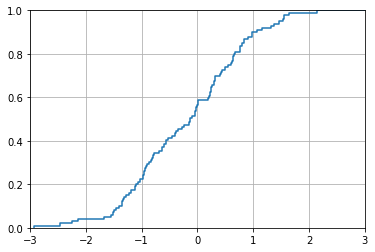

In [85]:
N  =  100
Pz =  np.arange(0,N)/(N-1)        # equally spaced steps

Zi =  st.norm.rvs(size=N)
Zi =  np.sort(Zi)                 # sorted RV samples

f01  = plt.figure(1, figsize=(6,4))
f01a = plt.plot(Zi,Pz,drawstyle='steps')
plt.axis([-3, 3, 0, 1])
plt.grid(True)

The RV samples above have been generated by simulation. At the end of this notebook we
shall give more details about this procedure.

Acredita-se, contudo, que na medida que o número  de amostras disponíveis for aumentando, a função empírica de probabilidade acumulada irá convergir para uma função determinística, que corresponderia então à _função de probabilidade acumulada_ (fpa), $P_X(x)$. Esta crença em uma _convergência_ introduz um aspecto subjetivo na análise, pois jamais haverá um número de amostras grande o suficiente para que $P_X(x)$ seja perfeitamente conhecida, embora seja ela uma informação fundamental nos cálculos de probabilidade que envolvam a variável aleatória $X$. 

Na prática, escolhe-se para fpa geralmente funções contínuas, que tenham uma justificativa física associada ao fenômeno que contextualiza a variável aleatória. Os modelos mais comuns serão apresentados mais adiante (incluindo a função de Gauss, usada no exemplo da figura acima). 

The script below compares a theoretical function (Gaussian) to the previous empirical distribution:

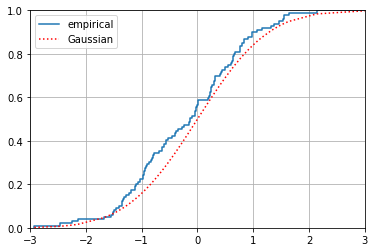

In [86]:
f02  = plt.figure(2, figsize=(6,4))
f02a = plt.plot(Zi, Pz, drawstyle='steps')
f02b = plt.plot(Zi, norm.cdf(Zi), 'r:')
plt.legend(('empirical','Gaussian'))
plt.axis([-3, 3, 0, 1])
plt.grid(True)

Na medida em que a função empírica aproxima uma função teórica (modelo) de probabilidade acumulada, a sua derivada aproxima o que se denomina _função de densidade de probabilidade_ (fdp), $p_X(x)$ , tal que:

\begin{align*}
&{\rm Prob} \left\{ X = x \right\}   = p_X(x) \, dx \\
&{\rm Prob} \left\{ X < x \right\}  = P_X(x) = \int_{-\infty}^{x} p_X(\chi) \, d\chi \\
&{\rm Prob} \left\{ x_{1} < X < x_{2} \right\}  = P_{X}(x_{2}) - P_{X}(x_{1})
                          = \int_{x_{1}}^{x_{2}} p_X(\chi) \, d\chi
\end{align*}

Observa-se que, devido à continuidade de domínio, a probabilidade de que a variável aleatória $X$ assuma um valor particular  é infinitesimal. Valores finitos de probabilidade são obtidos somente para intervalos no eixo das abscissas. 



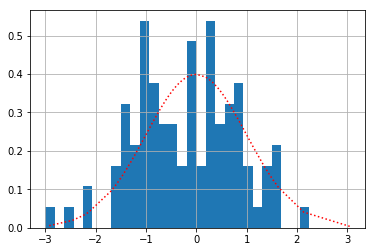

In [87]:
f03  = plt.figure(3, figsize=(6,4))
f03a = plt.hist(Zi, bins=32, range=(-3, 3), density=True)
f03b = plt.plot(Zi, norm.pdf(Zi), 'r:')
plt.grid(True)

Na figura acima pode-se ver, em linha tracejada, a f.d.p. associada à f.p.a. apresentada na fig. 1. Esta função suaviza o histograma de densidade de probabilidade, apresentado em linha cheia na mesma figura. A construção deste histograma é um pouco mais complexa que a da função empírica de probabilidade acumulada, uma vez que requer o arbítrio de um intervalo de discretização do eixo das abcissas. Uma vez definida esta discretização, o histograma é construído de forma a representar a fração de amostras pertencentes a cada intervalo, respeitando a condição de que a área total do histograma (sua integral) seja unitária. 

A passagem de funções empíricas para funções teóricas é tema da disciplina de Estatística, e não será aqui abordada em maiores detalhes. Entretanto, cumpre mencionar a existência de funções que são particularmente adequadas para o papel de distribuição de probabilidades, principalmente por estarem associadas a algum princípio físico pertinente ou simplesmente por respeitarem as propriedades axiomáticas:

\begin{align*}
\mbox{1)} & \;\;\; 0 < P_X(x) < 1 \\
\mbox{2)} & \;\;\; p_X(x) = \frac{dP_X(x)}{dx} \geq 0 \\
\mbox{3)} & \;\;\; \int_{-\infty}^{+\infty} p_X(x)  \, dx = 1
\end{align*}

Com base nestas definições, a rigor a função de densidade empírica deveria ser uma soma de funções tipo delta de Dirac (impulsos unitários nas coordenadas $x_i$):

$$  p_X(x) = \sum_{i = 1}^{N} {\frac{\delta(x - x_{i})}{N}} $$

mas dá-se preferência a uma apresentação mais suavizada, tal como a obtida do histograma normalizado apresentado na figura. 

Cabe salientar que a transição de funções empíricas para modelos teóricos representa um passo necessário para que, a partir de uma informação limitada, se possa levar a cabo um procedimento de análise que requer o conhecimento da propensão de ocorrência de valores muito grandes ou muito pequenos da variável aleatória (que sequer foram observados). Em suma, o uso de funções teóricas, $P_X(x)$ e $p_X(x)$, se dá em decorrência da necessidade de inter- e extrapolações a partir de dados disponíveis, para determinação de probabilidades que não foram obtidas experimentalmente.

## 3.2. Statistical moments and estimators

Define-se inicialmente como _valor esperado_, _valor médio_, ou simplesmente 
_média de uma variável aleatória_, o valor em seu domínio obtida de uma ponderação 
de todo o domínio pela fdp:

$$ {\rm E}\left\{ X \right\} = \mu_{X} = \int_{-\infty}^{+\infty}{x \, p_X(x) \,dx} $$

Demonstra-se facilmente que o operador ${\rm E}\left\{ \cdot \right\}$  é linear. 
Além disso, o seu uso pode ser aplicado também para quaisquer funções de 
variáveis aleatórias, $f(X)$, sendo de especial interesse a classe de funções 
$f(X) = X^k$, para a qual:

$$ {\rm E}\left\{ X^k \right\} = M_{X,k} = \int_{-\infty}^{+\infty}{x^{k} p_X(x) \,dx} $$
    
onde $M_{X,k}$ é denominado _momento estatístico de ordem $k$ da variável aleatória X_, ou simplesmente $n$-ésimo momento de $X$. O valor esperado de $X$ é um caso particular em que $k=1$, e portanto $M_{X,1} = \mu_X$.

Os momentos estatísticos podem ser alternativamente definidos após um deslocamento da origem do eixo das abscissas para que este coincida com o valor médio da variável aleatória:

$$ {\rm E}\left\{ \left(X - \mu_{X}\right) ^{k} \right\} = m_{X,k} = 
\int_{-\infty}^{+\infty}{\left( x - \mu_{X}\right)^{k} p_X(x) \,dx} $$

onde  é denominado momento _estatístico central de ordem $k$ da variável aleatória $X$_, 
ou simplesmente $n$-ésimo momento central de $X$. 
Observa-se que por definição $m_{X,1} = 0$. 
Já o segundo momento central, $m_{X,2} = \sigma^2_X$, recebe a denominação 
de _variância_, e sua raiz quadrada é o _desvio padrão_,  $\sigma_X$, que constitui uma 
medida da variabilidade (ou dispersão) de $X$. 
Assim como o valor médio é análogo ao centro de área da fdp, o desvio padrão é 
análogo ao seu raio de giração. A relação $\sigma_X/\mu_X$ é denominada _coeficiente de variação_, e também constitui uma medida da variabilidade de $X$, com a vantagem de ser adimensional e a desvantagem de tender ao infinito para variáveis aleatórias com média tendendo a zero.
Para processos com média diferente de zero tem-se que:

$$ {\rm E}\left\{ X^{2} \right\} = \sigma_{X}^{2} + \mu_{X}^{2} $$ 

É de fundamental importância não confundir os momentos de uma distribuição de 
probabilidade (abordagem axiomática da teoria de probabilidades) com os estimadores 
de momentos de uma distribuição (abordagem frequentista). 
A definição de estimadores não será abordada aqui em maiores detalhes, visto que 
é um vasto campo de estudos por si só. 
Estimadores são a fronteira entre a teoria matemática e o mundo real, consequência 
natural da intenção de se estabelecer uma analogia entre os dois contextos. 
Contudo, não se pode prescindir de relacionar os dois principais estimadores que 
serão aqui utilizados. Pode ser demonstrado que os seguintes estimadores da 
média, $\mu_X$, e do desvio padrão, $\sigma_X$:

\begin{align*}
\hat{\mu}_X &= \frac{1}{N} \sum_{i = 1}^{k}  x_i \\
\hat{\sigma}^2_X &= \frac{1}{(N-1)} \sum_{i = 1}^{k}  \left( x_i - \hat{\mu}_X  \right) ^2
\end{align*}

são não-tendenciosos (unbiased), pois tendem aos respectivos momentos quando $N$ tende a infinito. Deve-se observar o uso do chapéu $(\;\hat{\;}\;)$ para diferenciar o momento estatístico de seu estimador.
In Python, estimators of statistical moments of RV samples are obtained as follows:

In [88]:
μZ = Zi.mean()
σZ = Zi.std()

print('Mean value of samples Zi is:         {0:6.3f}'.format(μZ))
print('Standard deviation of samples Zi is: {0:6.3f}'.format(σZ))

Mean value of samples Zi is:         -0.167
Standard deviation of samples Zi is:  1.043


If $N$ is made to grow toward infinity, these estimators are expected to converge to 0 and 1,
respectively, for these limits are the exact statistical moments of a normal distribution,
from which the samples have been drawn by simulation.

## 3.3. The uniform distribution

Se uma variável aleatória, $U$, é uniformemente distribuída entre 0 e 1, então 
a sua função de densidade de probabilidade e a sua função de probabilidade 
acumulada são, respectivamente:

\begin{align*}
\nonumber
 p_{U}(u) &= 1, \hspace{1cm} 0 < u < 1 \\
\nonumber
 P_{U}(u) &= u, \hspace{1cm} 0 < u < 1 
\end{align*}

O primeiro momento é calculado como:

$$\mu_{U} = \int_{-\infty}^{\infty}{u \, p_{U}(u)\,du} 
          = \int_{0}^{1}{u \cdot 1\,du} =  1/2$$

enquanto o segundo momento central é:

$$\sigma_{U}^{2} = \int_{-\infty}^{\infty}{(u - 1/2)^{2} \, p_{U}(u)\,du}
                 = \int_{0}^{1}{(u - 1/2)^{2} \cdot 1 \,du} = 1/12 $$

Observa-se que $1/2$ e $1/\sqrt{12}$ são, respectivamente, a coordenada do 
centro de área e o raio de giração de um retângulo de lado unitário. 

A distribuição uniforme é de fundamental importância para várias técnicas de 
simulação, tais como a _Simulação de Monte Carlo_, sendo que diversos ambientes 
computacionais já trazem alguma função capaz de gerar números aleatórios 
uniformemente distribuídos e não-correlacionados. 


Mean value of samples Ui is:          0.533
Standard deviation of samples Ui is:  0.305


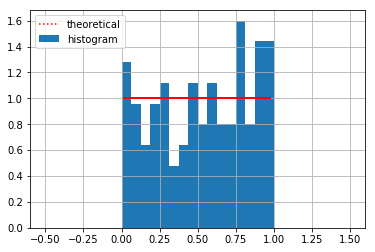

In [89]:
Ui  = st.uniform.rvs(size=N)

μU  = Ui.mean()
σU  = Ui.std()

print('Mean value of samples Ui is:         {0:6.3f}'.format(μU))
print('Standard deviation of samples Ui is: {0:6.3f}'.format(σU))

f04  = plt.figure(4, figsize=(6,4))
f04a = plt.hist(Ui, bins = 32, range=(-0.5,1.5), density=True)
f04b = plt.plot(Ui, uniform.pdf(Ui), 'r:')
plt.legend(('theoretical','histogram'))
plt.grid(True)

## 3.4. The normal distribution

No Teorema do Limite Central é deduzido que a soma de um grande número de variáveis aleatórias (por exemplo, erros acumulados) resulta ter uma função de distribuição de probabilidade que se denomina função de distribuição normal ou Gaussiana.

Curiosamente, a sua função de probabilidade acumulada não  pode ser conhecida em uma forma analítica fechada, embora a respectiva função de densidade seja:

$$  p_X(x) = \frac{1}{\sigma_{X} \sqrt{2 \pi}}
             \exp \left[ -\frac{1}{2}
             \left( \frac{x - \mu_{X}}{\sigma_{X}}\right)^2 \right] $$

Os parâmetros da distribuição são $\mu_X$ e $\sigma X$, que correspondem à média e ao desvio padrão da variável $X$, respectivamente. Esta correspondência direta entre os parâmetros da função e os momentos estatísticos é apenas mais uma das características que tornam a distribuição Gaussiana tão atrativa para fins práticos. Na verdade, é muito comum adotar-se a esta distribuição quando não se dispõe de nada além de estimativas de média e desvio padrão.

É comum que se o use o caso particular em que a variável aleatória tem média zero e desvio padrão unitário: 

\begin{align*}
 Z      &= \frac{X - \mu_{X}}{\sigma_{X}} \\
\phi(z) &= \frac{1}{\sqrt{2 \pi}} \exp \left( -\frac{z^2}{2} \right)
\end{align*}

sendo a função  denominada função de densidade de probabilidade Gaussiana padrão. 
Esta é a distribuição da qual simulamos amostras para os exemplos iniciais deste notebook. 
A correspondente função de probabilidade acumulada é:

$$ \Phi(z) = \int_{-\infty}^{z} \phi(\zeta) \, d\zeta $$

a qual, como já foi dito, não pode ser calculada analiticamente. 
A função $\Phi(z)$ encontra-se geralmente tabelada em livros de estatística, 
ou pode ser calculada através de uma aproximação por expansão assimptótica.
Linguagens de programação modernas, como Matlab ou Python, oferecem funções
apropriadas para sua determinação.

Uma característica muito importante da distribuição normal, que será amplamente 
explorada na sequência, é o fato de que uma combinação linear de variáveis 
aleatórias gaussianas, correlacionadas ou não, resulta também em uma variável 
gaussiana. 
Mais do que isso, qualquer sistema (dinâmico) linear, submetido a uma excitação 
(input) gaussiano, apresentará também uma resposta (output) gaussiana. 
Essa propriedade facilita a estimativa de valores extremos da resposta, 
que são de grande interesse prático.

### 3.5. Funções de distribuição conjunta de probabilidades

Foi vista anteriormente a definição de distribuição de probabilidade de 
uma variável aleatória, $X$. Esta distribuição pode ser formulada em termos 
de uma função de densidade de probabilidade (fdp), $p_X(x)$, ou uma função 
de probabilidade acumulada (fpa), $P_X(x)$. Se agora, ao invés de termos 
apenas uma única variável, tivermos um vetor de duas variáveis aleatórias:

$$ \vec{X} = \left[ X_{1} \;\; X_{2} \right] ^{\intercal} $$

as propriedades estatísticas deste vetor serão representadas por uma 
_distribuição conjunta de probabilidades_, que pode ser formulada em 
termos de uma _função de densidade de probabilidade conjunta_, $p_{\vec{X}}(\vec{x})$, 
ou uma  _função de probabilidade acumulada conjunta_, $P_{\vec{X}}(\vec{x})$, 
onde $\vec{x} = \left[ x_{1} \;\;x_{2} \right] ^{\intercal}$ é uma dada coordenada
do espaço amostral $n$-dimensional. A função $P_{\vec{X}}(\vec{x})$ é definida como:

$$ P_{\vec{X}}(\vec{x}) = {\rm Prob}\left\{ \left( X_{1} < x_{1}\right) \cap 
                                            \left( X_{2} < x_{2}\right)\right\} $$
   
sendo que a relação entre $p_{\vec{X}}(\vec{x})$ e $P_{\vec{X}}(\vec{x})$ é definida como:

\begin{align*}
P_{\vec{X}}(\vec{x}) &= \iint p_{\vec{X}}(\vec{x}) \, dx_1 dx_2 \\
p_{\vec{X}}(\vec{x}) &= \frac{\partial P_{\vec{X}}(\vec{x})}{\partial x_1 \partial x_2}
\end{align*}

As definições apresentadas nas equações acima podem facilmente ser extendidas 
para mais de duas variáveis aleatórias no vetor $\vec{X}$. 
A partir das definições acima, destacam-se as seguintes propriedades de 
$P_{\vec{X}}(\vec{x})$:

\begin{align*}
& P_{\vec{X}}(-\infty,-\infty) = 0 \\
& P_{\vec{X}}(+\infty,+\infty) = 1 \\
& P_{\vec{X}}(-\infty,x_{2})   = 0 \\
& P_{\vec{X}}(+\infty,x_{2})   = P_{X_{2}}(x_{2}) \\
& P_{\vec{X}}(x_{1},-\infty)   = 0 \\
& P_{\vec{X}}(x_{1},+\infty)   = P_{X_{1}}(x_{1})
\end{align*}

onde $P_{X_1}(x_1)$ e $P_{X_2}(x_2)$ são denominadas _funções de probabilidade 
acumulada marginal_, obtida integrando-se  em todas as dimensões exceto uma.
Na prática é muito difícil, senão impossível, estimar-se adequadamente 
parâmetros de uma distribuição multivariada a partir de amostras de um 
vetor de variáveis aleatórias. Isto se deve ao fato de que a distribuição 
multivariada deve conter informações completas sobre qualquer tipo de 
relação de dependência que exista entre as variáveis que compõem o vetor, 
ainda que as mesmas sejam não lineares.

Por outro lado, conforme os axiomas da teoria de probabilidades, se as variáveis 
aleatórias são independentes as funções conjuntas resultam ser simplesmente um 
produtório das respectivas funções marginais:

\begin{align*}
& P_{\vec{X}}(\vec{x}) = \prod_{i = 1}^{n} P_{X_i}(x_i) \\
& p_{\vec{X}}(\vec{x}) = \prod_{i = 1}^{n} p_{X_i}(x_i)
\end{align*}

É importante estabelecer desde já uma distinção entre o termo dependência e correlação. 
A correlação é uma forma particular de dependência, que é a de uma relação linear. 
Portanto, duas variáveis aleatórias correlacionadas são dependentes, 
mas duas variáveis dependentes não são necessariamente correlacionadas.

Como exemplo de uma dependência não-linear, imagine um vetor 
$\vec{X} = \left[ X_{1} \;\; X_{2} \right] ^{\intercal}$, tal que $X_1$ e $X_2$
tem uma relação funcional da forma:

$$X_{2} = X_{1}^{2} + \varepsilon$$

sendo que $X_1$ e $\varepsilon$ são variáveis gaussianas padrão _independentes_. 
Abaixo está apresentada uma simulação de dados conforme esta expressão.

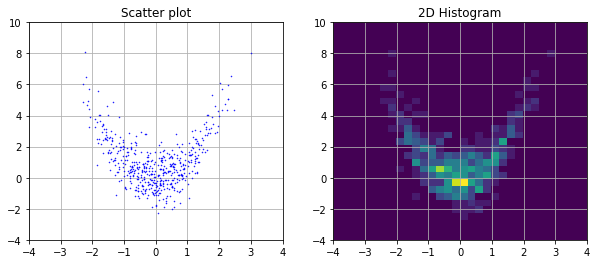

In [90]:
N  = 512

X1 = st.norm.rvs(size=N)
X2 = st.norm.rvs(size=N) + X1**2

f05  = plt.figure(5, figsize=(10,4))

plt.subplot(1,2,1)
f05a = plt.plot(X1, X2, 'b.', ms=1)
plt.axis([-4, 4, -4, 10])
plt.title('Scatter plot')
plt.grid(True)

plt.subplot(1,2,2)
f05a = plt.hist2d(X1, X2, bins=32, range=[[-4, 4],[-4, 10]])
plt.axis([-4, 4, -4, 10])
plt.title('2D Histogram')
plt.grid(True)

Supondo-se que o observador não conheça a relação funcional entre $X_1$ e $X_2$, 
e supondo-se que $\varepsilon$ não seja diretamente observável, pelo gráfico de amostras 
simuladas é percebe-se claramente uma dependência entre as duas variáveis. 
Dependendo da forma como esta dependência se apresenta, pode ser muito difícil, 
senão impossível, encontrar uma expressão adequada para $p_{\vec{X}}(\vec{x})$.

### 3.5. Statistical cross moments

Da mesma forma que variáveis aleatórias univariadas apresentam momentos estatísticos, variáveis multivariadas apresentam momentos estatísticos cruzados. Estes momentos são definidos como o valor esperado de monômios (produto de potências) de ordem , igual ao número de variáveis no vetor . Para o caso em que , os momentos cruzados centrais seriam dados por:
	(7)
No entanto, é de interesse prático somente o primeiro momento cruzado central (com ), denominado de covariância:
	(8)
A covariância também pode ser expressa na forma:
	(9)
onde  e  são os desvios padrão das respectivas distribuições marginais, e  é denominado coeficiente de correlação. Demonstra-se (pela inequação de Schwartz) que o coeficiente de correlação é um número adimensional tal que . O uso da notação  já antecipa o fato de que as covariâncias entre todos os pares de variáveis no vetor  constituem uma matriz simétrica, denominada matriz de covariância, .
A covariância, e sua forma adimensional representada pelo coeficiente de correlação, são medidas da dependência linear de duas variáveis aleatórias. O estimador do coeficiente de correlação é:
	(10)
com  amostras. Na fig. 1 está apresentado o cálculo do coeficiente de correlação estimado através da função corrcoef do Matlab. Percebe-se que embora as variáveis  e  sejam nitidamente dependentes, o coeficiente de correlação resulta ser relativamente pequeno (e de fato tende a zero) já que a dependência é fortemente não linear. A função corrcoef retorna a chamada matriz de correlação (para  conjuntos de amostras, referentes às  variáveis aleatórias do vetor ):
	(11)
onde a diagonal é sempre 1 pois a correlação de uma variável aleatória com ela mesma é máxima. Combinando-se as eqs. 9 e 11, e construindo-se a matriz diagonal:
	(12)
com os desvios padrão das  variáveis aleatórias do vetor , pode-se estabelecer uma relação entre as matrizes de covariância e de correlação como sendo:
	(13)
Esta relação é usada a seguir na expressão da distribuição gaussiana multivariada.


### 3.6 The Gaussian multivariate distribution 

Caso todas as variáveis aleatórias que componham o vetor  sejam gaussianas, a função de densidade de probabilidade conjunta será dada por:
	(14)
onde:
	(15)
é o vetor de médias e a matriz de covariância, , foi definida na seção anterior. Tendo-se em conta a eq. 13, a matriz de covariância pode ser re-escrita a partir de uma fatorização de Cholesky da matriz de correlação como:
	(16)
e consequentemente a inversa da matriz de covariancia é:
	(17)
a qual substituída na eq. 14 resulta em:
	(18)
Esta forma apresenta vantagens computacionais, pois ao invés de se calcular a inversa da matriz de covariância pode ser utilizada a fatorização de Cholesky da matriz de correlação, seguida de uma retro-substituição para se calcular os termos entre colchetes dentro da função exponencial. 
Deve-se, contudo, estar atento para o fato de que no caso de existir forte correlação entre algumas variáveis aleatórias isso fará com que a matriz de correlação seja mal condicionada. Neste caso o seu determinante tenderá a zero, e a fatorização de Cholesky será impossível. Mas isto também significa que alguma variável aleatória pode ser modelada diretamente como uma função linear de outras, sem prejuízo para a qualidade geral do modelo estatístico.
Quando o vetor de variáveis aleatórias é constituído de variáveis gaussianas padrão  correlacionadas, com  e  para todo , a eq. 18 simplifica-se para:



É interessante aproveitar a possibilidade de se calcular analiticamente a distribuição de probabilidade no caso gaussiano para se visualizar a respectiva função de densidade de probabilidade. Para isto definem-se duas variáveis aleatórias com média zero e desvio padrão unitário, sendo o coeficiente de correlação . A visualização da função expressa na eq. 19 está apresentada na fig. 2. Observa-se que as linhas de contorno (curvas de nível) nesta figura tem forma elíptica. As elipses estarão alinhadas com uma reta cuja inclinação depende do coeficiente de correlação e da relação entre os desvios padrões das duas variáveis. Para um coeficiente de correlação positivo e desvios padrões iguais, as elipses estarão alinhadas com uma reta inclinada de  com o eixo , no sentido positivo (anti-horário). Para desvios padrões iguais e coeficiente de correlação nulo, as elipses se tornarão círculos concêntricos.

A eq. 18 indica que é possível transformar-se um vetor de variáveis gaussianas multivariadas, , em um vetor de variáveis gaussianas padrão (média zero, desvio padrão unitário) não correlacionadas, , através da expressão:
	(20)
Consequentemente, é possível inverter esta relação para produzir simulações do vetor  a partir de simulações não correlacionadas do vetor . Esta inversão resulta:
	(21)
 
O uso desta transformação está ilustrado na fig. 3, onde se utiliza o Matlab para produzir simulações de duas variáveis gaussianas padrão com coeficiente de correlação . As simulações apresentadas correspondem portanto à distribuição de probabilidade ilustrada na fig. 2.



### 3.7. Linear combination of Gaussian RV vectors


Como já foi mencionado anteriormente, o teorema do limite central diz que a soma de variáveis aleatórias com distribuição qualquer tende a uma variável gaussiana. Particularmente, a combinação linear de variáveis gaussianas preserva a distribuição gaussiana. Calcula-se a seguir o valor esperado e o desvio padrão desta combinação, já que estes dois parâmetros definem completamente a sua distribuição de probabilidades.
Uma combinação linear de variáveis multivariadas pode ser expressa como:
	(22)
Aplicando-se o operador de valor esperado tem-se que:
	(23)
Ou seja, como o operador de expectância é linear ele pode avançar para dentro do somatório bem como atravessar constantes multiplicativas. Portanto:
	(24)
Da mesma forma, pode-se usar o operador de expectância para o cálculo da variância da combinação:
	(25)
Fatorando-se as constantes a_i e convertendo-se o quadrado em um duplo somatório tem-se que:
	(26)
O operador de expectância pode agora avançar para dentro dos somatórios, atravessando as constantes, o que leva a:
	(27)
Finalmente, reconhecendo-se que a operação de expectância resultante corresponde à definição de covariância, chega-se a:
	(28)
Tem-se portanto as eqs. 24 e 28 como expressões simples para o cálculo da média e do desvio padrão da combinação linear de variáveis correlacionadas. Estes resultados são válidos independentemente da distribuição de probabilidades das variáveis combinadas, mas completam a descrição estatística no caso de se combinarem variáveis gaussianas. 
Caso se combinem variáveis não correlacionadas, os coeficientes de correlação são unitários para  e nulos para , o que resulta na solução particular:
	(29)
Este resultado será usado a seguir para explicar um processo aleatório muito importante na dinâmica de sistemas.

Example: the Bernoulli process

Pela definição original, um processo de Bernoulli, , é uma vetor de números aleatórios não correlacionados, que podem assumir os valores  ou  sempre com as mesmas probabilidades  e , respectivamente. Sem perda de generalidade, assume-se aqui que os dois valores possíveis para o processo são  e , com igual probabilidade , e passamos a estudar o que ocorre com um processo que corresponde à soma acumulada dos elementos no correspondente vetor de variáveis aleatórias. Portanto, o -ésimo termo deste processo, , é dado por:
	(30)
Calculado-se a expectância como uma ponderação pela probabilidade discreta de cada valor possível para uma variável aleatória, o valor médio e o desvio padrão das variáveis (não correlacionadas)  podem ser encontrados como:


Consequentemente, fazendo-se uso das eqs. 24 e 29 da seção anterior tem-se que:
	(31)
	(32)
Ou seja, o processo  é um processo com média zero e desvio padrão crescente. A fig. 4 apresenta simulações deste processo, que possui alguns usos e interpretações muito úteis. 
Por exemplo, o ruído captado por um acelerômetro (sensor de vibrações), quando integrado no tempo para produzir um sinal de velocidade (ou duplamente integrado para produzir um deslocamento) resulta em uma deriva de zero, devida ao crescimento da variância decorrente da soma acumulada implícita na integração numérica. Consequentemente, este problema de instrumentação requer técnicas especiais de integração para ser evitado.
Um processo de Bernoulli bivariado, quando integrado no tempo, produz um processo aleatório bidimensional chamado random walk. Este processo é utilizado como modelo do movimento browniano (movimento de partículas minúsculas flutuando na superfície de um líquido, observadas já em 1827 pelo botânico Robert Brown). Esta abordagem probabilística permitiu a Einstein a confirmação da existência de átomos e móleculas, permitindo uma estimativa de seu espaçamento médio. Estas estimativas foram posteriormente confirmadas por Jean Perrin em 1909, rendendo-lhe um Prêmio Nobel.
